In [1]:
#Import pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Creating a SparkSession with an app name

In [2]:
# Import SparkSession
from pyspark.sql import SparkSession


In [3]:

spark_session = SparkSession.builder.appName("ChicagoCrimeAnalysis").getOrCreate()


In [4]:
spark_session
# Import a Spark function from library


Defining the schema for loading the Chicago crime dataset 

In [5]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, TimestampType, FloatType

schema_name = StructType([
    StructField("ID", IntegerType(), True),
    StructField("CaseNumber", StringType(), True),
    StructField("Date", StringType(), True),
    StructField("Block", StringType(), True),
    StructField("IUCR", StringType(), True),
    StructField("PrimaryType", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("LocationDescription", StringType(), True),
    StructField("Arrest", StringType(), True),
    StructField("Domestic", StringType(), True),
    StructField("Beat", IntegerType(), True),
    StructField("District", IntegerType(), True),
    StructField("Ward", IntegerType(), True),
    StructField("CommunityArea", IntegerType(), True),
    StructField("FBICode", StringType(), True),
    StructField("XCoordinate", FloatType(), True),
    StructField("YCoordinate", FloatType(), True),
    StructField("Year", IntegerType(), True),
    StructField("UpdatedOn", TimestampType(), True),
    StructField("Latitude", FloatType(), True),
    StructField("Longitude", FloatType(), True),
    StructField("Location", StringType(), True)
])


 Loading the Chicago crime data


In [6]:
df = spark_session.read.format("csv").option("header", "true").option("delimiter", ",").schema(schema_name).load("Crimes_-_2001_to_Present.csv")


In [7]:
df.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [8]:
df.show()

+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn| Latitude| Longitude|            Location|
+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|       9|  12|           61|    08B|  1165074.

Clean the data:
* Remove all null values.
* Change 'Date' column data type

In [9]:
from pyspark.sql.functions import col, count

# Count the number of null values in each column
null_counts = df.select([count(col(c).isNull().alias(c)) for c in df.columns])

# Print the null counts
null_counts.show()


+-------------------------+-----------------------------------------+-----------------------------+-------------------------------+-----------------------------+-------------------------------------------+-------------------------------------------+-----------------------------------------------------------+---------------------------------+-------------------------------------+-----------------------------+-------------------------------------+-----------------------------+-----------------------------------------------+-----------------------------------+-------------------------------------------+-------------------------------------------+-----------------------------+---------------------------------------+-------------------------------------+---------------------------------------+-------------------------------------+
|count((ID IS NULL) AS ID)|count((CaseNumber IS NULL) AS CaseNumber)|count((Date IS NULL) AS Date)|count((Block IS NULL) AS Block)|count((IUCR IS NULL) AS IUCR)|c

In [10]:
#Remove all null values.
from pyspark.sql.functions import col
df = df.na.fill("Not Available")
df.show()

+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|      ID|CaseNumber|                Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn| Latitude| Longitude|            Location|
+--------+----------+--------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|10224738|  HY411648|09/05/2015 01:30:...|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|       9|  12|           61|    08B|  1165074.

In [11]:
from pyspark.sql.functions import to_timestamp

# Change 'Date' column data type
df = df.withColumn("Date", to_timestamp("Date", "MM/dd/yyyy hh:mm:ss a"))
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- CaseNumber: string (nullable = false)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = false)
 |-- IUCR: string (nullable = false)
 |-- PrimaryType: string (nullable = false)
 |-- Description: string (nullable = false)
 |-- LocationDescription: string (nullable = false)
 |-- Arrest: string (nullable = false)
 |-- Domestic: string (nullable = false)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- CommunityArea: integer (nullable = true)
 |-- FBICode: string (nullable = false)
 |-- XCoordinate: float (nullable = true)
 |-- YCoordinate: float (nullable = true)
 |-- Year: integer (nullable = true)
 |-- UpdatedOn: timestamp (nullable = true)
 |-- Latitude: float (nullable = true)
 |-- Longitude: float (nullable = true)
 |-- Location: string (nullable = false)



In [12]:
df.show()

+--------+----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|      ID|CaseNumber|               Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn| Latitude| Longitude|            Location|
+--------+----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|10224738|  HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|       9|  12|           61|    08B|  1165074.0|  

Filtering the data for last ten years.

In [13]:
from pyspark.sql.functions import col
df = df.where(col("Year") >= 2013)
df.show()


+--------+----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|      ID|CaseNumber|               Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn| Latitude| Longitude|            Location|
+--------+----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|10224738|  HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|       9|  12|           61|    08B|  1165074.0|  

Remove all the records with the following crime types:
* 'NON-CRIMINAL (SUBJECT SPECIFIED)'
* 'OTHER OFFENSE'
* 'STALKING'
* 'NON - CRIMINAL'
* 'ARSON

In [14]:
# # Remove all the records with the following crime types
# from pyspark.sql.functions import col

# df = df.where(~col("PrimaryType").isin(
#     "NON-CRIMINAL (SUBJECT SPECIFIED)",
#     "OTHER OFFENSE",
#     "STALKING",
#     "NON - CRIMINAL",
#     "ARSON"
# ))


In [15]:
# Remove all the records with the following crime types
df = df.filter(col("PrimaryType").isin([
    "NON-CRIMINAL (SUBJECT SPECIFIED)",
    "OTHER OFFENSE",
    "STALKING",
    "NON - CRIMINAL",
    "ARSON"
]) == False)

Merge the similar crime types.
* For example, change 'Primary Type' of cases that have 'Primary Type' as ‘SEX OFFENSE’ or ‘PROSTITUTION’ such that they should have the same 'Primary Type'.

In [16]:
from pyspark.sql.functions import when, col

df = df.select(
    *[when(col("PrimaryType").isin(["SEX OFFENSE", "PROSTITUTION"]),
           "SEX OFFENSE/PROSTITUTION")
      .otherwise(col(name)).alias(name)
      for name in df.columns]
)
df.show()


+--------+----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|      ID|CaseNumber|               Date|               Block|IUCR|       PrimaryType|         Description| LocationDescription|Arrest|Domestic|Beat|District|Ward|CommunityArea|FBICode|XCoordinate|YCoordinate|Year|UpdatedOn| Latitude| Longitude|            Location|
+--------+----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+-------------+-------+-----------+-----------+----+---------+---------+----------+--------------------+
|10224738|  HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|           BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true| 924|       9|  12|           61|    08B|  1165074.0|  

Analyze the data and present results:
* Show year-wise trend of the crime for last ten years.
* Find out at which hour of the day crime is highest.
* Find top ten crimes and present them as a bar chart.

In [17]:
# Show year-wise trend of the crime for last ten years.
crime_orderwise = df.groupBy("Year").count().orderBy("Year").limit(10)
crime_orderwise.show()

+----+-----+
|Year|count|
+----+-----+
|2013|  195|
|2014|  447|
|2015|90219|
|2016|  203|
|2017|  689|
|2018|  610|
|2019|  717|
|2020|  330|
|2021|   14|
|2022|   98|
+----+-----+



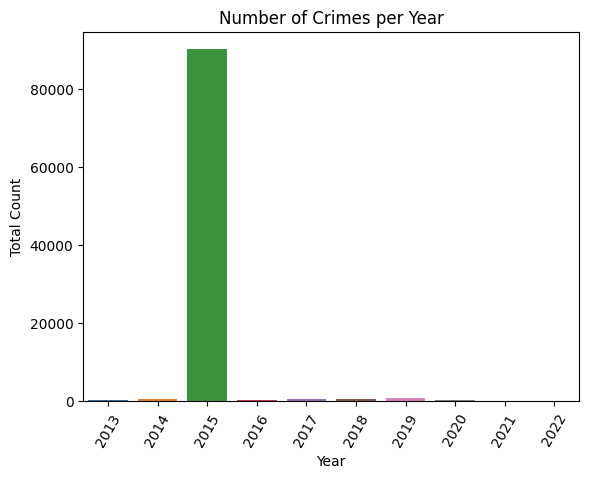

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
crime_orderwise_df = crime_orderwise.toPandas()
sns.barplot(x="Year", y="count", data=crime_orderwise_df)
plt.xticks(rotation=60)
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Number of Crimes per Year")
plt.show()


In [19]:
from pyspark.sql.functions import hour, desc
# Find out at which hour of the day crime is highest.
hour_orderwise = df.groupBy(hour(col("Date")).alias("hour")).count().orderBy(desc("count"))
hour_orderwise.show(1)


+----+-----+
|hour|count|
+----+-----+
|  18| 5437|
+----+-----+
only showing top 1 row



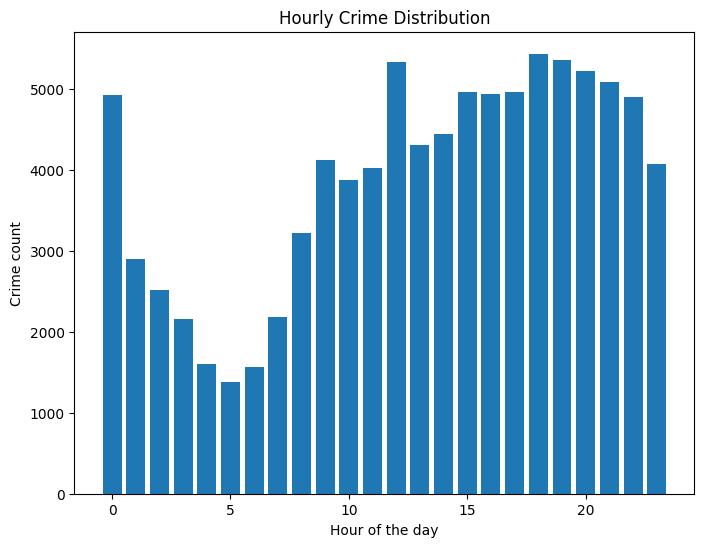

In [21]:
# Convert the Spark DataFrame to a Pandas DataFrame
hour_orderwise_df = hour_orderwise.toPandas()

# Create a bar plot of the crime counts by hour
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(hour_orderwise_df['hour'], hour_orderwise_df['count'], width=0.8)
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Crime count')
ax.set_title('Hourly Crime Distribution')
plt.show()



In [22]:
from pyspark.sql.functions import desc
top10_crimes = df.groupBy("PrimaryType").count().orderBy(desc("count")).limit(10)
top10_crimes_df = top10_crimes.toPandas()
top10_crimes_df

,PrimaryType,count
0,THEFT,22607
1,BATTERY,18456
2,CRIMINAL DAMAGE,11364
3,NARCOTICS,7870
4,DECEPTIVE PRACTICE,6574
5,ASSAULT,6383
6,BURGLARY,5439
7,ROBBERY,3969
8,MOTOR VEHICLE THEFT,3918
9,CRIMINAL TRESPASS,2314


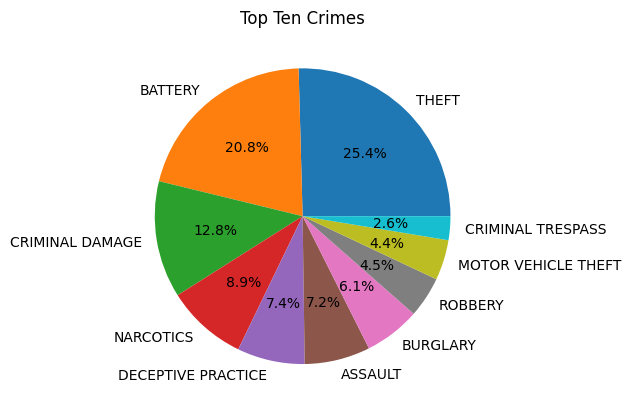

In [23]:
import matplotlib.pyplot as plt
plt.pie(top10_crimes_df["count"], labels=top10_crimes_df["PrimaryType"], autopct="%1.1f%%")
plt.title("Top Ten Crimes")
plt.show()